# Phase 3 Project

Data can be found at: https://www.kaggle.com/itsmesunil/bank-loan-modelling

The data found for this project was collected by a bank.  They wanted to determine who was the most likely to accept the offer for a personal loan.  

The business problem is to expand the number of 'asset customers' the bank has.  This means customers who are paying interst to the bank and there for increasing the bank's overall networth.  The idea is to create a machine learning model that will accurately predict the liklihood someone will accept a personal loan. Using this informatino the bank can selectively market their personal loan program and expand their number of 'asset customers'.

## Data Description:

### ID
Customer ID
### Age
Customer's age in completed years
### Experience
years of professional experience
### Income
Annual income of the customer ($000)
### ZIPCode
Home Address ZIP code.
### Family
Family size of the customer
### CCAvg
Avg. spending on credit cards per month ($000)
### Education
Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
### Mortgage
Value of house mortgage if any. ($000)
### Personal Loan
Did this customer accept the personal loan offered in the last campaign?
### Securities Account
Does the customer have a securities account with the bank?
### CD Account
Does the customer have a certificate of deposit (CD) account with the bank?
### Online
Does the customer use internet banking facilities?
### CreditCard
Does the customer use a credit card issued by UniversalBank?

#### Import the data.

In [158]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [160]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [161]:
df.shape

(5000, 14)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'ZIP Code'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>,
        <AxesSubplot:title={'center':'CD Account'}>],
       [<AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

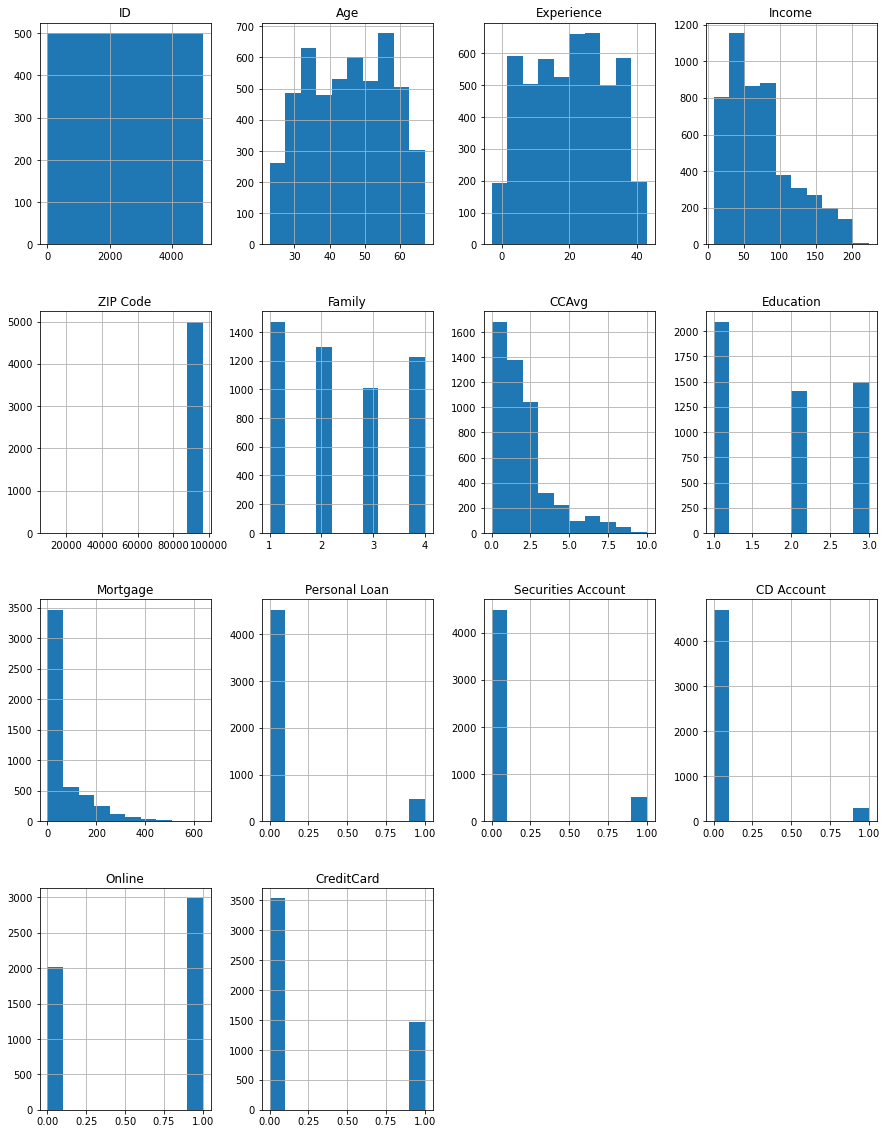

In [163]:
df.hist(figsize = (15, 20))

## Cleaning the Data:

In [164]:
df = df.drop(columns = ['ZIP Code', 'ID'])

In [165]:
df.columns = df.columns.str.replace(' ', '_')

In [166]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [167]:
## Mortgage and credit card average need to be split by T/F and continuous data.
#Create two new columns:
#The first is replacing any numerical value not 0 with 1.
#The second is using what numerical value there is to create a normal distribution of data for Mortage amount and average monthly CC spending

In [168]:
### First I created a new column that is categorical determining if said person is a mortgage holder or not.
#This was done with a lambda function followed by multiplying everytning by 1 to convert the column from booleans to 0 and 1.

In [169]:
df['Mrtg_holder'] = df['Mortgage'].map(lambda x: True if (x != 0) else False)*1

In [170]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mrtg_holder
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0,1
4997,63,39,24,2,0.3,3,0,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0,0


In [171]:
### Next is changing all of the 0 values in the Mortgage column to actual values that could be used in the data set.
# We only lost 5 values during the process which is great.

In [172]:
# 0 values were converted to NaN values and then interpolated according to thier index.

In [173]:
df['Mortgage'] = df['Mortgage'].replace(0, np.nan)

In [174]:
df = df.interpolate(method = 'values')

In [175]:
print(df.iloc[23:123])

     Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
23    44          18      43       2    0.7          1     163.0   
24    36          11     152       2    3.9          1     159.0   
25    43          19      29       3    0.5          1      97.0   
26    40          16      83       4    0.2          3     102.0   
27    46          20     158       1    2.4          1     107.0   
..   ...         ...     ...     ...    ...        ...       ...   
118   41          16      73       3    3.0          1     279.5   
119   32           7     112       1    4.6          1     366.0   
120   54          29      12       2    0.2          3     316.4   
121   52          26      38       3    0.9          3     266.8   
122   58          32      73       2    0.7          2     217.2   

     Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
23               0                   1           0       0           0   
24               0                 

In [176]:
### Let's do it again with CCAvg

In [177]:
df['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [178]:
df['CCAvg'] = df['CCAvg'].replace(0, np.nan)

In [179]:
df = df.interpolate(method = 'values')

In [180]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mrtg_holder
0,25,1,49,4,1.6,1,NaN,0,1,0,0,0,0
1,45,19,34,3,1.5,1,NaN,0,1,0,0,0,0
2,39,15,11,1,1.0,1,NaN,0,0,0,0,0,0
3,35,9,100,1,2.7,2,NaN,0,0,0,0,0,0
4,35,8,45,4,1.0,2,NaN,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,88.0,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85.0,0,0,0,1,0,1
4997,63,39,24,2,0.3,3,85.0,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,85.0,0,0,0,1,0,0


In [181]:
# Dropping remaining null values.

In [182]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              5
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Mrtg_holder           0
dtype: int64

In [183]:
df = df.dropna()

In [184]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mrtg_holder
5,37,13,29,4,0.4,2,155.00,0,0,0,1,0,1
6,53,27,72,2,1.5,2,138.00,0,0,0,1,0,0
7,50,24,22,1,0.3,3,121.00,0,0,0,0,1,0
8,35,10,81,3,0.6,2,104.00,0,0,0,1,0,1
9,34,9,180,1,8.9,3,107.75,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,88.00,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85.00,0,0,0,1,0,1
4997,63,39,24,2,0.3,3,85.00,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,85.00,0,0,0,1,0,0


### Removing Outliers

In [185]:
## Removing outliers killed the Personal_Loan column which is essential to this project.  
#This was a very clean data set so it is possible they were already removed.

## EDA:

In [186]:
## Taking a closer look at Ranges of 

<AxesSubplot:xlabel='Personal_Loan', ylabel='CCAvg'>

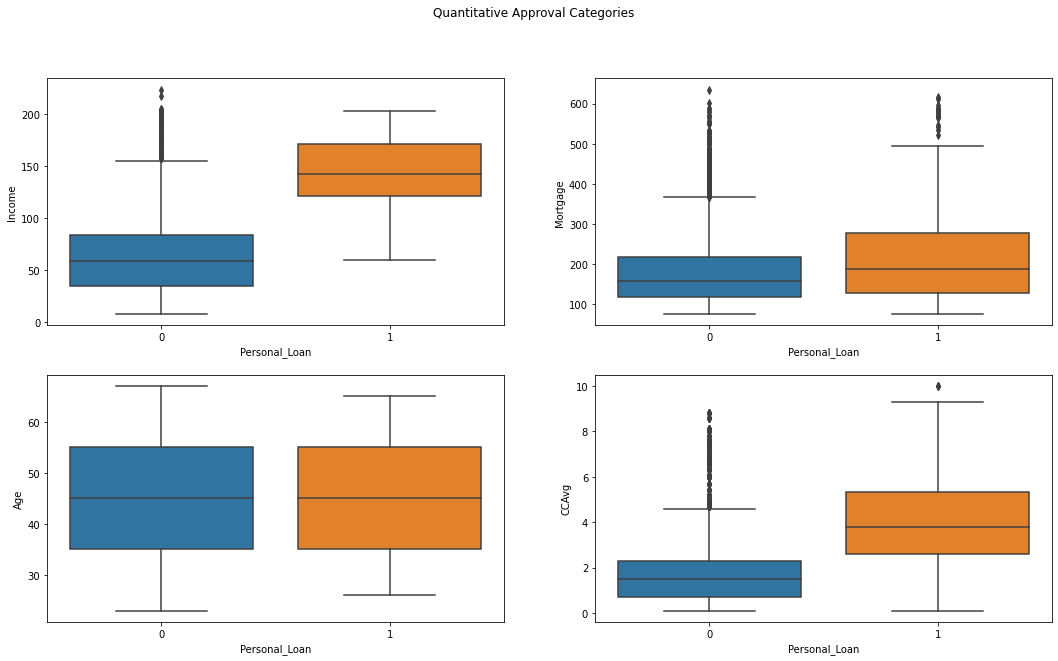

In [187]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Quantitative Approval Categories')

sns.boxplot(ax=axes[0, 0], data=df, x='Personal_Loan', y='Income')
sns.boxplot(ax=axes[0, 1], data=df, x='Personal_Loan', y='Mortgage')
sns.boxplot(ax=axes[1, 0], data=df, x='Personal_Loan', y='Age')
sns.boxplot(ax=axes[1, 1], data=df, x='Personal_Loan', y='CCAvg')


<AxesSubplot:xlabel='Education', ylabel='Income'>

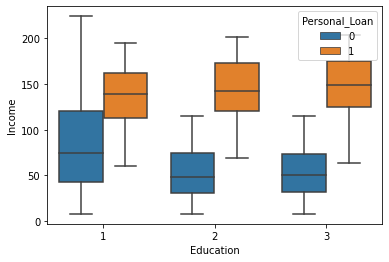

In [188]:
sns.boxplot(x = 'Education', y = 'Income', data = df, hue = 'Personal_Loan')

<AxesSubplot:xlabel='Family', ylabel='Mortgage'>

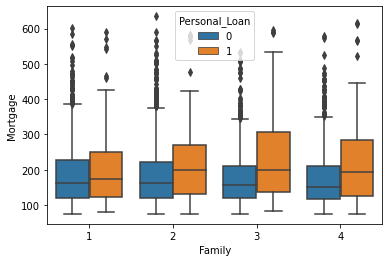

In [189]:
sns.boxplot(x = 'Family', y = 'Mortgage', data = df, hue = 'Personal_Loan')

In [190]:
## Dummy variables

In [191]:
pd.get_dummies(df, columns = ['Family', 'Education'], drop_first = True)

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mrtg_holder,Family_2,Family_3,Family_4,Education_2,Education_3
5,37,13,29,0.4,155.00,0,0,0,1,0,1,0,0,1,1,0
6,53,27,72,1.5,138.00,0,0,0,1,0,0,1,0,0,1,0
7,50,24,22,0.3,121.00,0,0,0,0,1,0,0,0,0,0,1
8,35,10,81,0.6,104.00,0,0,0,1,0,1,0,1,0,1,0
9,34,9,180,8.9,107.75,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,88.00,0,0,0,1,0,0,0,0,0,0,1
4996,30,4,15,0.4,85.00,0,0,0,1,0,1,0,0,1,0,0
4997,63,39,24,0.3,85.00,0,0,0,0,0,0,1,0,0,0,1
4998,65,40,49,0.5,85.00,0,0,0,1,0,0,0,1,0,1,0


In [192]:
## Train Test Split

In [193]:
X = df.drop('Personal_Loan', axis = 1)
y = df['Personal_Loan']

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Logistic Regression:

In [195]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model_log = logreg.fit(X_train, y_train)
model_log

/Users/andrewozbun/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [196]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)


In [197]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    3552
1     194
Name: Personal_Loan, dtype: int64
0    0.948211
1    0.051789
Name: Personal_Loan, dtype: float64


In [198]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    1183
1      66
Name: Personal_Loan, dtype: int64
0    0.947158
1    0.052842
Name: Personal_Loan, dtype: float64


## Confusion Matrix:

In [199]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[1118   21]
 [  45   65]]


In [200]:
from sklearn.metrics import plot_confusion_matrix

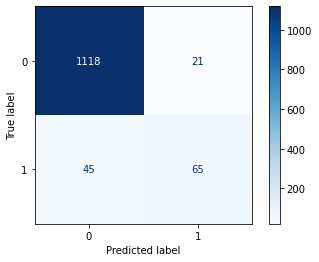

In [201]:
plot_confusion_matrix(logreg, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()